# Code - Chapter 1: Exploratory Data Analysis

## Estimates of Location
### Example: Location Estimates of Population and Murder Rates

In [5]:
import pandas as pd
from scipy import stats

In [8]:
state = pd.read_csv('state.csv')
print(state)

             State  Population  Murder.Rate Abbreviation
0          Alabama     4779736          5.7           AL
1           Alaska      710231          5.6           AK
2          Arizona     6392017          4.7           AZ
3         Arkansas     2915918          5.6           AR
4       California    37253956          4.4           CA
5         Colorado     5029196          2.8           CO
6      Connecticut     3574097          2.4           CT
7         Delaware      897934          5.8           DE
8          Florida    18801310          5.8           FL
9          Georgia     9687653          5.7           GA
10          Hawaii     1360301          1.8           HI
11           Idaho     1567582          2.0           ID
12        Illinois    12830632          5.3           IL
13         Indiana     6483802          5.0           IN
14            Iowa     3046355          1.9           IA
15          Kansas     2853118          3.1           KS
16        Kentucky     4339367 

In [9]:
state['Population'].mean() #The mean is 6.162.876

6162876.3

In [10]:
stats.trim_mean(state['Population'], 0.1) #Drop the 10% from each end.
# The trimmed mean is 4.783.697

4783697.125

In [5]:
state['Population'].median() # The median is 4.436.369

4436369.5

> The mean is *bigger* than the trimmed mean, which is bigger than the median.


This is because the trimmed mean excludes the largest and smallest five states (trim = 0.1 drops 10% from each end, and we have 50 states). If we want to compute the average murder rate for the country, we need to use a **weighted mean** or **weighted median** to account for different populations in the states.

In [14]:
import numpy as np
import weightedstats as w

In [16]:
np.average(state['Murder.Rate'], weights=state['Population'])
# Ordinary Mean = 4.06
# Weighted Mean - Setting weights by population
# Using weights is more accurate with the data

4.445833981123393

In [18]:
w.numpy_weighted_median(state['Murder.Rate'], weights=state['Population'])
# Weighted Median

4.4

> In this case, the weighted mean and the weighted median are about the same.

&nbsp;
## Estimates of Variability
### Example: Variability Estimates of State Population

In [19]:
state['Population'].std() # The Standard Deviation is 6.848.235

6848235.347401142

In [20]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)
# IQR -> Inter quartile Range is 4.847.308

4847308.0

In [24]:
import statsmodels
from statsmodels import robust

statsmodels.robust.scale.mad(state['Population']) 
# MAD -> Median Absolute Deviation is 3.849.876

3849876.1459979336

> The standard deviation is almost twice as large as the MAD. This is not surprising since the standard deviation is sensitive to outliers.

&nbsp;
## Exploring the Data Distribution
### Example: Percentiles and Boxplots

In [27]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]) # Percentile

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

> The median is 4 murders per 100.000 people , although there is a quite a bit of variability: the 5th percentile is 1.6 and the 95th percentile is 6.51 .

Text(0, 0.5, 'Population (millions)')

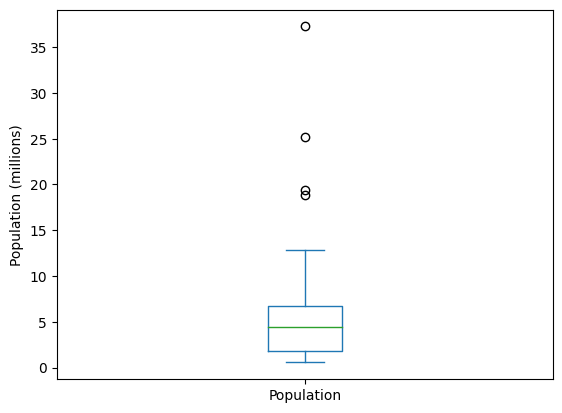

In [30]:
ax = (state['Population']/1_000_000).plot.box() # Boxplot
ax.set_ylabel('Population (millions)') # Add y label

From this boxplot we can immediately see:
- Median state population is about 5 million (horizontal line in the box).
- Half the states fall between about 2 millions and about 7 million.
- The top and bottom of the box are the 75th and 25th percentiles, respectively.
- The dashed lines (in this case, the vertical blue line), referred to as *whiskers*, extend from the top and bottom of the box to indicate the range for the bulk of the data.
- Data outside of the whiskers is plotted as single points (or circles) called outliers.

&nbsp;
### Example: Frequency Tables and Histograms

In [45]:
# Frequency Table
binnedPopulation = pd.cut(state['Population'], 10) # Cutting 'Population" into 10 divisions
binnedPopulation.value_counts()

# How is divided? 
# interval width = (max value - min value) / bins


(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [51]:
Population = state['Population']
ip = (Population.max() - Population.min()) / 10 # width of each bin

# numpy helps to create the variables
Count, intervals = np.histogram(Population, bins = 10)
# Count = [24 14  6  2  1  1  1  0  0  1]
# Intervals = [  563626.  4232659.  7901692. 11570725. 15239758. 18908791. 22577824. 26246857. 29915890. 33584923. 37253956.]

# create dataFrame
df = pd.DataFrame(index = np.linspace(1,10,10), columns = ['start', 'end', 'count'])
df['start'] = intervals[:-1]
df['end'] = intervals[1:]
df['count'] = Count
print(df)

           start         end  count
1.0     563626.0   4232659.0     24
2.0    4232659.0   7901692.0     14
3.0    7901692.0  11570725.0      6
4.0   11570725.0  15239758.0      2
5.0   15239758.0  18908791.0      1
6.0   18908791.0  22577824.0      1
7.0   22577824.0  26246857.0      1
8.0   26246857.0  29915890.0      0
9.0   29915890.0  33584923.0      0
10.0  33584923.0  37253956.0      1


Text(0.5, 0, 'Population (millions)')

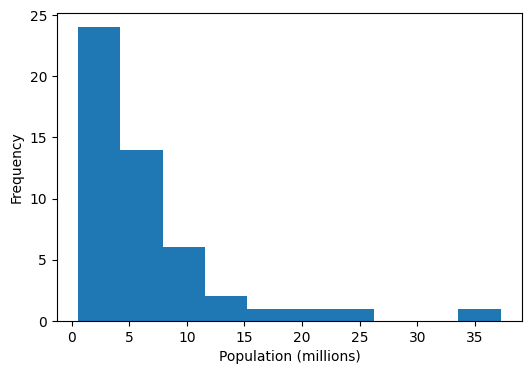

In [52]:
# Histogram
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(6,4))
ax.set_xlabel('Population (millions)') # Add x label

From this Histogram we can see:
- Empty bins are included in the graph.
- Bins are of equal width.
- Bars are contiguous (no empty spaces shows between bars, unless there is an empty bin).
- The number of bins (equivalently, bin size) is up to the user.

&nbsp;
### Example: Density Plots and Estimates

Text(0.5, 0, 'Murder Rate (per 100.000)')

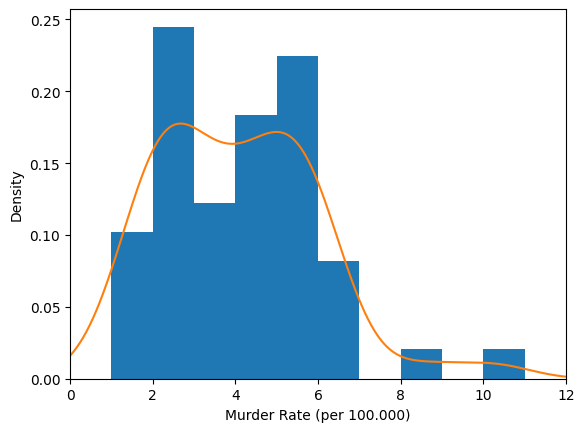

In [53]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax) #(1)
ax.set_xlabel('Murder Rate (per 100.000)')
#(1) Plot functions often take an optional axis (ax) argument, which will cause the plot to be added to the same graph

> A key distinction from the histogram plotted above is the scale of the y-axis: a density plot corresponds to plotting the histogram as a proportion rather than counts.

&nbsp;
## Exploring Binary and Categorical Data
### Example: Bar Chart

In [57]:
dfw = pd.read_csv('dfw_airline.csv')
print(dfw)

    Carrier      ATC   Weather  Security    Inbound
0  64263.16  84856.5  11235.42    343.15  118427.82


Text(0, 0.5, 'Count')

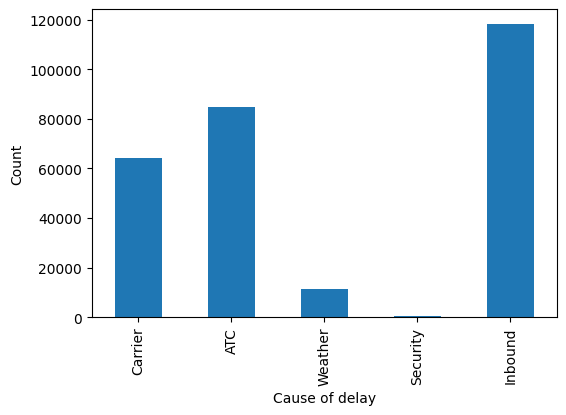

In [56]:
ax = dfw.transpose().plot.bar(figsize=(6,4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

> Note that a bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represent values of a single variable on a numerica scale. In a histogram, the bars are typically shown touching eac other, with gaps indicating values that did not occur in the data. In a bar chart, the bars are shown separate from one another.

&nbsp;
### Example: Correlation

In [70]:
import seaborn as sns

# Uploading data sets...
sp500_px = pd.read_csv('sp500_data.csv.gz', index_col=0)
sp500_sym = pd.read_csv('sp500_sym.csv')

<AxesSubplot: >

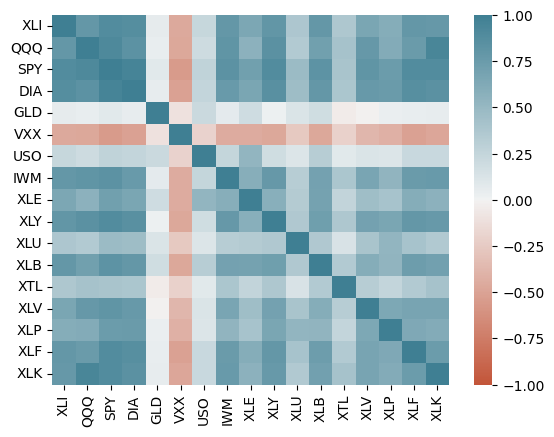

In [71]:
# Correlation graph
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

In [72]:
# If the main goal is to visualize the correlation matrix, rather than creating a plot per se, then
corr = etfs.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


/var/folders/6t/3qz6ldld4ygbbnnzvvyh1hbh0000gn/T/ipykernel_35518/529794500.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.00,0.79,0.89,0.87,0.06,-0.47,0.24,0.78,0.65,0.80,0.38,0.78,0.37,0.66,0.60,0.79,0.78
QQQ,0.79,1.00,0.91,0.83,0.04,-0.47,0.20,0.81,0.56,0.84,0.35,0.71,0.42,0.78,0.61,0.75,0.95
SPY,0.89,0.91,1.00,0.95,0.08,-0.55,0.27,0.83,0.71,0.89,0.48,0.83,0.41,0.81,0.74,0.88,0.89
DIA,0.87,0.83,0.95,1.00,0.05,-0.51,0.26,0.76,0.66,0.85,0.46,0.79,0.38,0.77,0.75,0.86,0.84
GLD,0.06,0.04,0.08,0.05,1.00,-0.11,0.22,0.07,0.19,0.02,0.12,0.18,-0.04,-0.01,0.03,0.04,0.05
VXX,-0.47,-0.47,-0.55,-0.51,-0.11,1.00,-0.20,-0.45,-0.45,-0.47,-0.26,-0.47,-0.21,-0.38,-0.42,-0.51,-0.48
USO,0.24,0.20,0.27,0.26,0.22,-0.20,1.00,0.25,0.53,0.18,0.11,0.32,0.08,0.12,0.12,0.22,0.23
IWM,0.78,0.81,0.83,0.76,0.07,-0.45,0.25,1.00,0.59,0.78,0.33,0.70,0.39,0.66,0.54,0.76,0.76
XLE,0.65,0.56,0.71,0.66,0.19,-0.45,0.53,0.59,1.00,0.58,0.34,0.69,0.26,0.45,0.41,0.60,0.56
XLY,0.80,0.84,0.89,0.85,0.02,-0.47,0.18,0.78,0.58,1.00,0.37,0.72,0.37,0.70,0.66,0.78,0.77


- The ETFs for the S&P 500 (SPY) and the Dow Jones Index (DIA) have a high correlation. Similarly, 
- The QQQ and the XLK, composed mostly of technology companies, are positively correlated. 
- Defensive ETFs, such as those tracking gold prices (GLD), oil prices (USO), or market volatility (VXX), tend to be weakly or negatively correlated with other ETFs.


&nbsp;
### Example: Scatterplots

In [73]:
# Uploading data sets...

telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
# Filtering the sector variable with 'telecommunications_services' and taking the symbol from the data set
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
# Filtering from a date and with the symbols

In [75]:
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


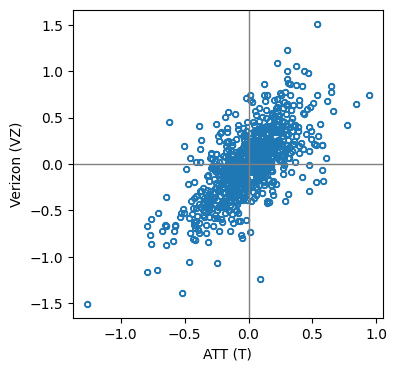

In [74]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker = '$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color = 'grey', lw=1)
ax.axvline(0, color = 'grey', lw=1)

> The returns have a positive relationship: while they cluster around zero, on most days, the stock go up or go down in tandem (upper-right and lower-left quadrants). There are fewer days where one stock goes down significantly while the other stock goes up, or vice versa. 

&nbsp;
## Exploring Two or More Variables
### Example: Hexagonal Binning and Contours

Scatterplots are fine when there us a relatively small number of data values. The plot of stocks returns above involves only about 750 points. For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship.

In [76]:
# We need to filter the data first
kc_tax = pd.read_csv('kc_tax.csv')
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape
# 3 variables with hundreds of records

(432693, 3)

In [112]:
kc_tax0

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


Text(0, 0.5, 'Tax-Assessed Value')

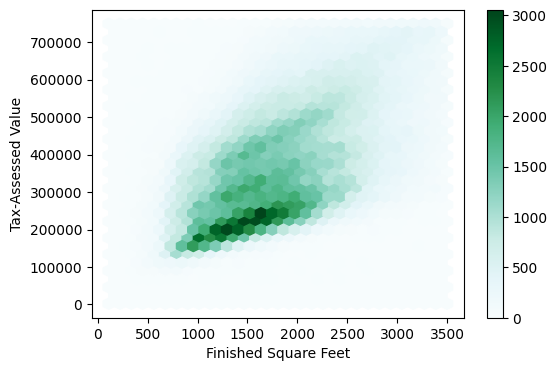

In [78]:
# Hexagonal binning
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(6,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

- Rather than plotting points, which would appear as a monolithic dark cloud, we grouped the records into hexagonal bins and plotted the hexagons with a color indicating the number of records in that bin. In this chart, the positive relationship between square feet and tax-assessed value is clear. 

> An interesting feature is the hint of additional bands above the main (intense color) band at the bottom, indicating homes that have the same square footage as those in the main band but a higher tax-assessed value.

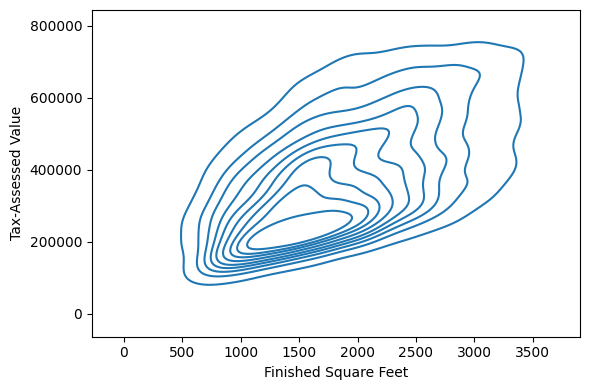

In [80]:
import matplotlib.pyplot as plt

# Contours 
fig, ax = plt.subplots(figsize=(6,4))
sns.kdeplot(data=kc_tax0.sample(10000), x ='SqFtTotLiving', y ='TaxAssessedValue', ax = ax)
ax.set_ylabel('Tax-Assessed Value')
ax.set_xlabel('Finished Square Feet')

plt.tight_layout()
plt.show()

> Here we used contours overlaid onto a scatter plot to visualize the relationship between two numeric variables. The contours are essentially a topographical map to two variables; each contour band represents a specific density of points, increasing as one nears a "peak". This plot shows a similar story as the hexagonal binning one: there is a secondary "north" of the main peak.

&nbsp;
### Example: Contingency Table
A useful way to summarize two categorical variables is a contingency table - a table of counts by category.

In [81]:
lc_loans = pd.read_csv('lc_loans.csv')
print(lc_loans)

             status grade
0        Fully Paid     B
1       Charged Off     C
2        Fully Paid     C
3        Fully Paid     C
4           Current     B
...             ...   ...
450956      Current     D
450957      Current     D
450958      Current     D
450959      Current     D
450960   Fully Paid     A

[450961 rows x 2 columns]


In [86]:
crosstab = lc_loans.pivot_table(index='grade', columns = 'status',
                                aggfunc=lambda x: len(x), margins=True) #(1)
# Setting index as grade and counting the status column

df = crosstab.loc['A':'G',:].copy() #(2)
# We took just the index column

df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis = 0) #(3)
df['All'] = df['All'] / sum(df['All']) #(4)
perc_crosstab = df
#(1) The margins keyword argument will add the column and row sums
#(2) We create a copy of the pivot table, ignoring the column sums
#(3) We divide the rows with the row sum
#(4) We divide the 'All' column by its sum

print(crosstab)
print(perc_crosstab) # Percentages from the crosstab


status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961
status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118

In [38]:
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


- This is taken from data provided by Lending Club, a leader in the peer-to-peer lending business. The grade goes from A (high) to G (low). The outcome is either fully paid, current, late, or charged off (the balance of the loan is not expected to be collected). These tables show the count and row percentages. 
> High-grade loans have a very low late/charge-off percentage as compared with lower-grade loans.

&nbsp;
### Example: Boxplots

Text(0.5, 0.98, '')

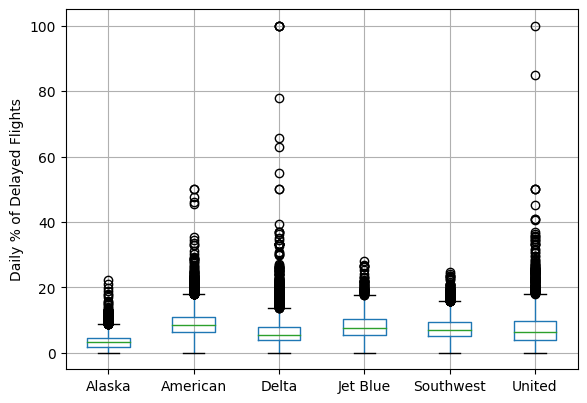

In [100]:
# Boxplot
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
ax.set_title('')
plt.suptitle('')

> Alaska stands out as having the fewest delays, while American has the most delays: the lower quartile for American is higher than the upper quartile for Alaska.

&nbsp;
### Example: Violin Plot

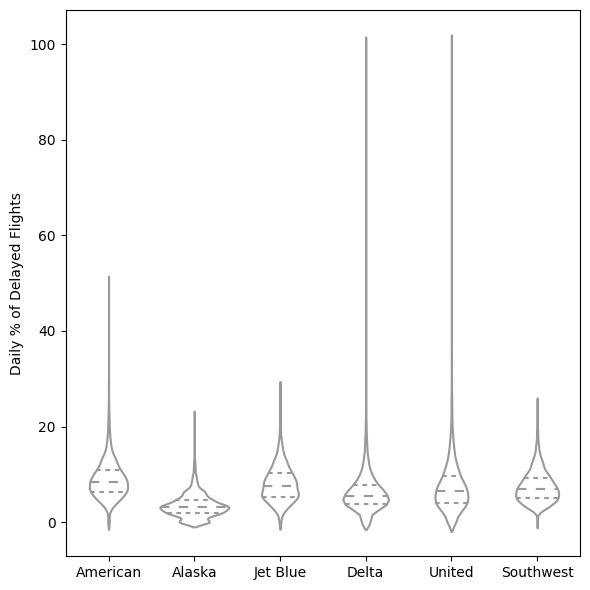

In [109]:
# Violin Plot
fig, ax = plt.subplots(figsize=(6,6))
sns.violinplot(data = airline_stats, x = 'airline', y = 'pct_carrier_delay',
               ax = ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

> The violin plot shows a concentration in the distribution near zero from Alaska and, to a lesser extent, Delta. This phenomenon is not as obvious in the boxplot.

&nbsp;
### Visualizing Multiple Variables

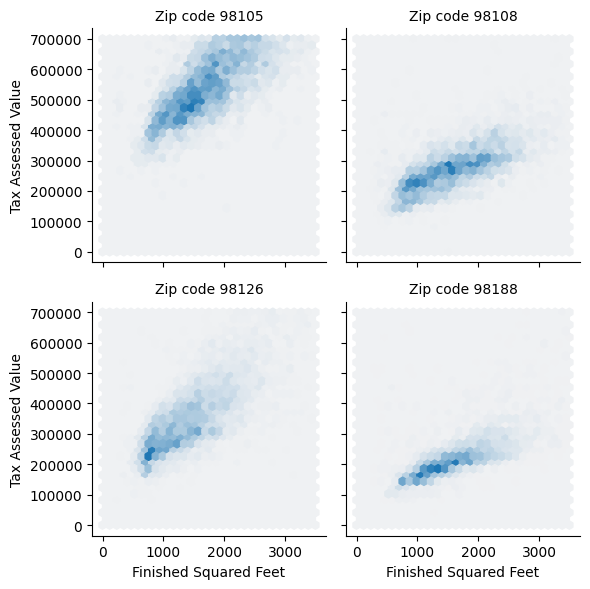

In [110]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y,gridsize=30, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2) #(1)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
      extent=[0, 3500, 0, 700000]) #(2)
g.set_axis_labels('Finished Squared Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()
#(1) Use the arguments col and row to specify the conditioning variables. For a single conditioning variable,
# use col together with col_wrap to wrap the faceted graphs into multiple rows.
#(2) The map method calls the hexbin function with subsets of the original data set for the different zip
# codes. extent defines the limits of the x- and y-axes.

> Now the picture is much clearer: tax-assessed value is much higher in some zip codes (98105, 98126) than in others (98108, 98188). This disparity gives rise to the clusters observed in the hexagonal binning one.
